# IA et Médecine Personnalisée

**Cours interactif - UE IA en Santé**

Ce notebook vous guidera à travers les concepts fondamentaux de l'intelligence artificielle appliquée à la médecine personnalisée.

---

## Table des matières

1. [De l'Inférence Populationnelle à la Prédiction Individuelle](#section1)
2. [Statistiques Conventionnelles vs IA](#section2)
3. [Digitalisation des Patients](#section3)
4. [Jumeaux Numériques (Digital Twins)](#section4)
5. [Application Pratique : Prédiction du Risque Cardiovasculaire](#section5)

---
## 1. De l'Inférence Populationnelle à la Prédiction Individuelle <a id="section1"></a>

### 📌 Points clés

**Approche statistique traditionnelle :**
- 🎯 Objectif : **Inférence populationnelle**
- 📊 Méthode : Observer un échantillon → Généraliser à une population
- 🔍 Question type : "Pour tous les patients, la stratégie A est-elle meilleure que B ?"
- ⚠️ Limite : Stratégie optimale pour le **groupe**, pas forcément pour l'**individu**

**Approche Machine Learning :**
- 🎯 Objectif : **Prédiction individuelle**
- 🤖 Méthode : Apprendre des patterns dans les données → Prédire pour un patient spécifique
- 🔍 Question type : "Pour CE patient, quel est son risque personnel ?"
- ✅ Avantage : Personnalisation du soin

### 💡 Exemple concret

**Statistiques classiques :** "Les patients fumeurs ont 2x plus de risque de maladie cardiovasculaire"

**IA/ML :** "Ce patient de 45 ans, fumeur, avec ces paramètres biologiques spécifiques, a 23% de risque à 10 ans"

In [3]:
# Installation et import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Bibliothèques importées avec succès !")

✅ Bibliothèques importées avec succès !


---
## 2. Statistiques Conventionnelles vs IA <a id="section2"></a>

### 📌 Points clés : Raisonnements différents

#### 🔬 Raisonnement statistique "usuel"

**Questions posées :**
1. Est-ce que la stratégie A est supérieure à la stratégie B ?
2. Les patients ayant eu l'événement X présentent-ils plus souvent cet issue ?

→ **Inférence d'un échantillon à une population générale**

#### 🤖 Raisonnement IA

**Pour CE patient spécifiquement :**
1. **Early Warning** : Le risque de survenue de tel évènement est de X%
2. **Aide à la décision** : La meilleure stratégie est la stratégie A
3. **Phénotypage** : L'évolution est possiblement similaire à ce groupe de patients

→ **Prédiction individuelle personnalisée**

### 📌 Points clés : Limites communes

**🔴 Représentativité des données**
- Biais de sélection
- Enveloppe convexe (données hors distribution)
- Validité externe

**🔴 Enjeux méthodologiques**
- Effet "boîte noire" (interprétabilité)
- Validation externe nécessaire

**🔴 Cadre réglementaire**
- AI Act (Europe)
- RGPD / CNIL
- Espace européen des données de santé (EEDS)

**🔴 Facteur humain**
- Garantie humaine de confiance
- Formation des professionnels de santé
- Utiliser l'IA comme un médicament : indication, limite, effet secondaire

In [4]:
# Chargement des données de Framingham Heart Study
# (Étude épidémiologique sur les facteurs de risque cardiovasculaire)

try:
    # Tentative de chargement via kagglehub
    import kagglehub
    from kagglehub import KaggleDatasetAdapter
    
    file_path = "framingham.csv"
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "aasheesh200/framingham-heart-study-dataset",
        file_path
    )
    print("✅ Données chargées via Kaggle")
except:
    # Alternative : chargement depuis un fichier local ou URL
    url = "https://raw.githubusercontent.com/your-repo/framingham.csv"
    try:
        df = pd.read_csv(url)
        print("✅ Données chargées depuis URL")
    except:
        print("⚠️ Impossible de charger les données. Création d'un jeu de données simulé...")
        # Création de données simulées pour la démonstration
        np.random.seed(42)
        n_samples = 1000
        df = pd.DataFrame({
            'male': np.random.choice([0, 1], n_samples),
            'age': np.random.randint(30, 70, n_samples),
            'currentSmoker': np.random.choice([0, 1], n_samples),
            'cigsPerDay': np.random.randint(0, 40, n_samples),
            'BMI': np.random.normal(26, 4, n_samples),
            'totChol': np.random.normal(230, 40, n_samples),
            'sysBP': np.random.normal(130, 20, n_samples),
            'diaBP': np.random.normal(80, 10, n_samples),
            'glucose': np.random.normal(85, 20, n_samples),
            'TenYearCHD': np.random.choice([0, 1], n_samples, p=[0.85, 0.15])
        })
        print("✅ Données simulées créées")

# Affichage des premières lignes
print(f"\n📊 Dimensions du dataset : {df.shape[0]} patients, {df.shape[1]} variables\n")
print(df.head())

# Informations sur les variables
print("\n📋 Informations sur les variables :")
print(df.info())

⚠️ Impossible de charger les données. Création d'un jeu de données simulé...
✅ Données simulées créées

📊 Dimensions du dataset : 1000 patients, 10 variables

   male  age  currentSmoker  cigsPerDay        BMI     totChol       sysBP  \
0     0   46              0          14  22.142821  212.401484  126.346759   
1     1   38              0          16  29.743526  251.987977  121.275165   
2     0   62              1          22  22.518930  233.036821  131.663794   
3     0   49              0          23  25.145151  165.597142   99.596486   
4     0   42              0          18  28.241226  271.274719  135.264058   

       diaBP    glucose  TenYearCHD  
0  86.990996  74.514279           0  
1  76.576384  65.803720           0  
2  87.394635  99.988142           1  
3  88.641807  85.435044           0  
4  73.464888  47.927930           0  

📋 Informations sur les variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #

In [ ]:
# Analyse exploratoire des données

print("📊 STATISTIQUES DESCRIPTIVES")
print("="*50)
print(df.describe())

# Vérification des valeurs manquantes
print("\n⚠️ VALEURS MANQUANTES")
print("="*50)
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✅ Aucune valeur manquante")

# Distribution de la variable cible
print("\n🎯 DISTRIBUTION DE LA VARIABLE CIBLE (TenYearCHD)")
print("="*50)
target_dist = df['TenYearCHD'].value_counts()
target_pct = df['TenYearCHD'].value_counts(normalize=True) * 100
print(f"Pas d'atteinte dans les 10 ans (0) : {target_dist[0]} patients ({target_pct[0]:.1f}%)")
print(f"Atteinte dans les 10 ans : {target_dist[1]} patients ({target_pct[1]:.1f}%)")

📊 STATISTIQUES DESCRIPTIVES
             male         age  currentSmoker   cigsPerDay          BMI  \
count  1000.00000  1000.00000    1000.000000  1000.000000  1000.000000   
mean      0.51000    49.90500       0.517000    19.793000    26.232448   
std       0.50015    11.59329       0.499961    11.473351     3.983543   
min       0.00000    30.00000       0.000000     0.000000    12.452745   
25%       0.00000    40.00000       0.000000    10.000000    23.487966   
50%       1.00000    50.00000       1.000000    20.000000    26.420228   
75%       1.00000    60.00000       1.000000    29.250000    28.979840   
max       1.00000    69.00000       1.000000    39.000000    39.983511   

           totChol        sysBP        diaBP      glucose   TenYearCHD  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean    228.402294   130.038322    80.395672    84.574480     0.129000  
std      40.156835    19.667514    10.043129    19.641321     0.335368  
min      96.4

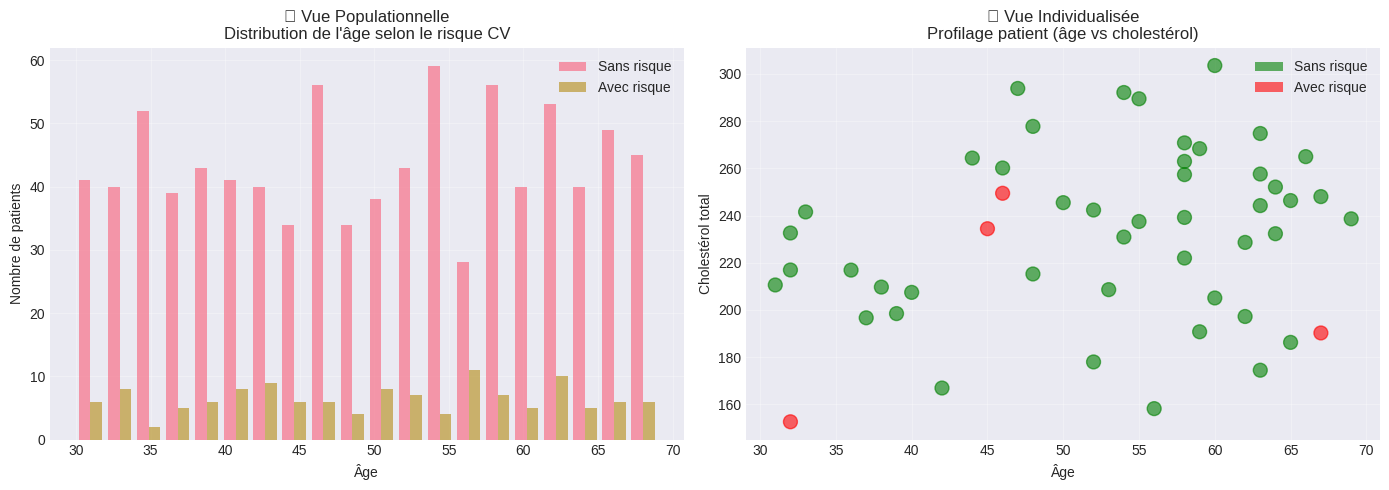


💡 Interprétation :
- Graphique de gauche : Approche statistique classique (population)
- Graphique de droite : Chaque point = un patient unique (approche personnalisée)


In [6]:
# Visualisation : Approche populationnelle vs individuelle

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Distribution de l'âge selon le risque (vue populationnelle)
axes[0].hist([df[df['TenYearCHD']==0]['age'], df[df['TenYearCHD']==1]['age']], 
             label=['Sans risque', 'Avec risque'], bins=20, alpha=0.7)
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre de patients')
axes[0].set_title('📊 Vue Populationnelle\nDistribution de l\'âge selon le risque CV')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Graphique 2 : Exemple de prédiction individuelle
# Sélection d'un échantillon de patients
sample_patients = df.sample(50)
colors = ['green' if x == 0 else 'red' for x in sample_patients['TenYearCHD']]
axes[1].scatter(sample_patients['age'], sample_patients['totChol'], 
               c=colors, alpha=0.6, s=100)
axes[1].set_xlabel('Âge')
axes[1].set_ylabel('Cholestérol total')
axes[1].set_title('🎯 Vue Individualisée\nProfilage patient (âge vs cholestérol)')
axes[1].grid(alpha=0.3)

# Légende personnalisée
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', alpha=0.6, label='Sans risque'),
                   Patch(facecolor='red', alpha=0.6, label='Avec risque')]
axes[1].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

print("\n💡 Interprétation :")
print("- Graphique de gauche : Approche statistique classique (population)")
print("- Graphique de droite : Chaque point = un patient unique (approche personnalisée)")

### 📌 Points clés : IA et Médecine Personnalisée - Finalités

#### 🎯 Applications principales

**1. 🧬 Phénotypage**
- Identification de sous-groupes de patients
- Clustering de profils similaires
- Découverte de nouvelles entités cliniques

**2. 🩺 Aide à la décision clinique**
- Recommandations de traitement personnalisées
- Optimisation des protocoles thérapeutiques
- Prédiction de réponse aux traitements

**3. ⚠️ Early Warning (Alerte précoce)**
- Détection précoce de dégradation clinique
- Prédiction de complications
- Systèmes d'alerte en temps réel

**4. 📚 Pédagogie**
- Formation des professionnels de santé
- Simulation de cas cliniques
- Retour d'expérience automatisé

#### ⚠️ État actuel (début 2026)
- Peu de modèles déployés en routine clinique
- Nombreux projets de recherche
- Barrières : validation, réglementation, acceptabilité

---
## 3. Digitalisation des Patients <a id="section3"></a>

### 📌 Points clés : Données d'entrée

#### 🔬 Rôle de l'expert médical
- **Sélection des variables pertinentes** : L'expertise clinique guide le choix des features
- **Validation des résultats** : Interprétation médicale indispensable
- **Feature engineering** : Création de variables dérivées cliniquement pertinentes

#### 📊 Feature Selection (Sélection de variables)
- **Qualité > Quantité** : Mieux vaut peu de variables pertinentes que beaucoup de bruit
- **Méthodes** : Corrélation, importance des variables, connaissances médicales
- **Objectif** : Éviter le surapprentissage, améliorer l'interprétabilité

#### 🔄 Multimodalité et interopérabilité
- **Entrepôts de Données de Santé (EDS)** : Centralisation des données
- **Standards** : HL7, FHIR pour l'échange de données
- **Défi** : Hétérogénéité des sources (imagerie, biologie, clinique, -omics)

📋 Variables sélectionnées pour l'analyse :
1. male
2. age
3. currentSmoker
4. cigsPerDay
5. BMI
6. totChol
7. sysBP
8. diaBP
9. glucose


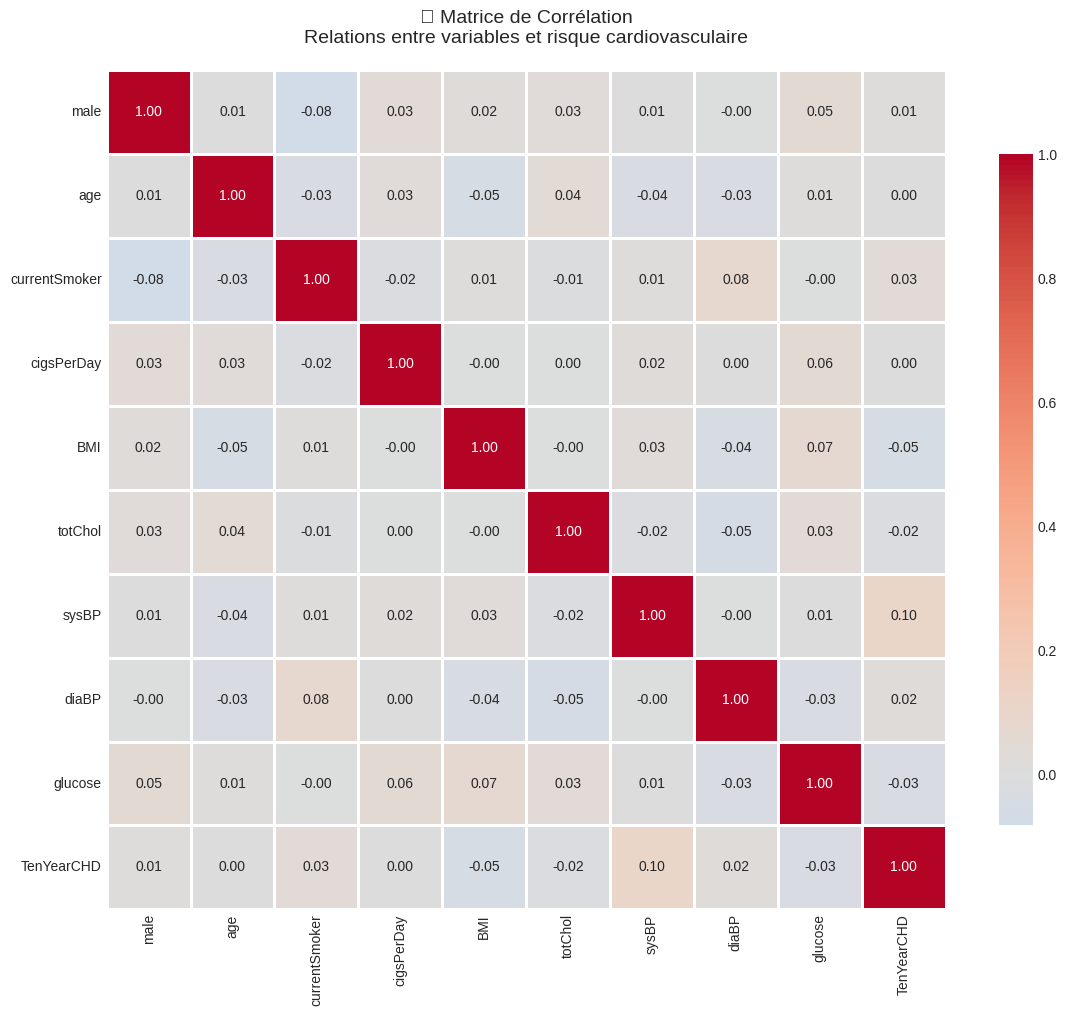


💡 Interprétation de la corrélation avec TenYearCHD :
- sysBP           : corrélé modérément      positivement (+0.105)
- currentSmoker   : corrélé faiblement      positivement (+0.032)
- diaBP           : corrélé faiblement      positivement (+0.023)
- male            : corrélé faiblement      positivement (+0.013)
- age             : corrélé faiblement      positivement (+0.004)
- cigsPerDay      : corrélé faiblement      positivement (+0.003)
- totChol         : corrélé faiblement      négativement (-0.023)
- glucose         : corrélé faiblement      négativement (-0.028)
- BMI             : corrélé faiblement      négativement (-0.045)


In [7]:
# Préparation des données pour l'analyse

# Gestion des valeurs manquantes (si présentes)
df_clean = df.dropna()

# Sélection des features et de la cible
features = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BMI', 'totChol', 'sysBP', 'diaBP', 'glucose']
X = df_clean[features]
y = df_clean['TenYearCHD']

print("📋 Variables sélectionnées pour l'analyse :")
print("="*50)
for i, feat in enumerate(features, 1):
    print(f"{i}. {feat}")

# Calcul de la matrice de corrélation
correlation_matrix = df_clean[features + ['TenYearCHD']].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('🔗 Matrice de Corrélation\nRelations entre variables et risque cardiovasculaire', 
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Interprétation de la corrélation avec TenYearCHD :")
target_corr = correlation_matrix['TenYearCHD'].sort_values(ascending=False)[1:]
for feat, corr in target_corr.items():
    direction = "positivement" if corr > 0 else "négativement"
    strength = "fortement" if abs(corr) > 0.3 else "modérément" if abs(corr) > 0.1 else "faiblement"
    print(f"- {feat:15s} : corrélé {strength:15s} {direction} ({corr:+.3f})")

🔧 FEATURE ENGINEERING
Création de variables dérivées basées sur l'expertise médicale...

✅ smoking_score = currentSmoker × cigsPerDay
✅ chol_age_ratio = totChol / age
✅ mean_BP = (sysBP + 2×diaBP) / 3
✅ metabolic_risk = (BMI × glucose) / 100

📊 Nombre de variables : 9 → 13


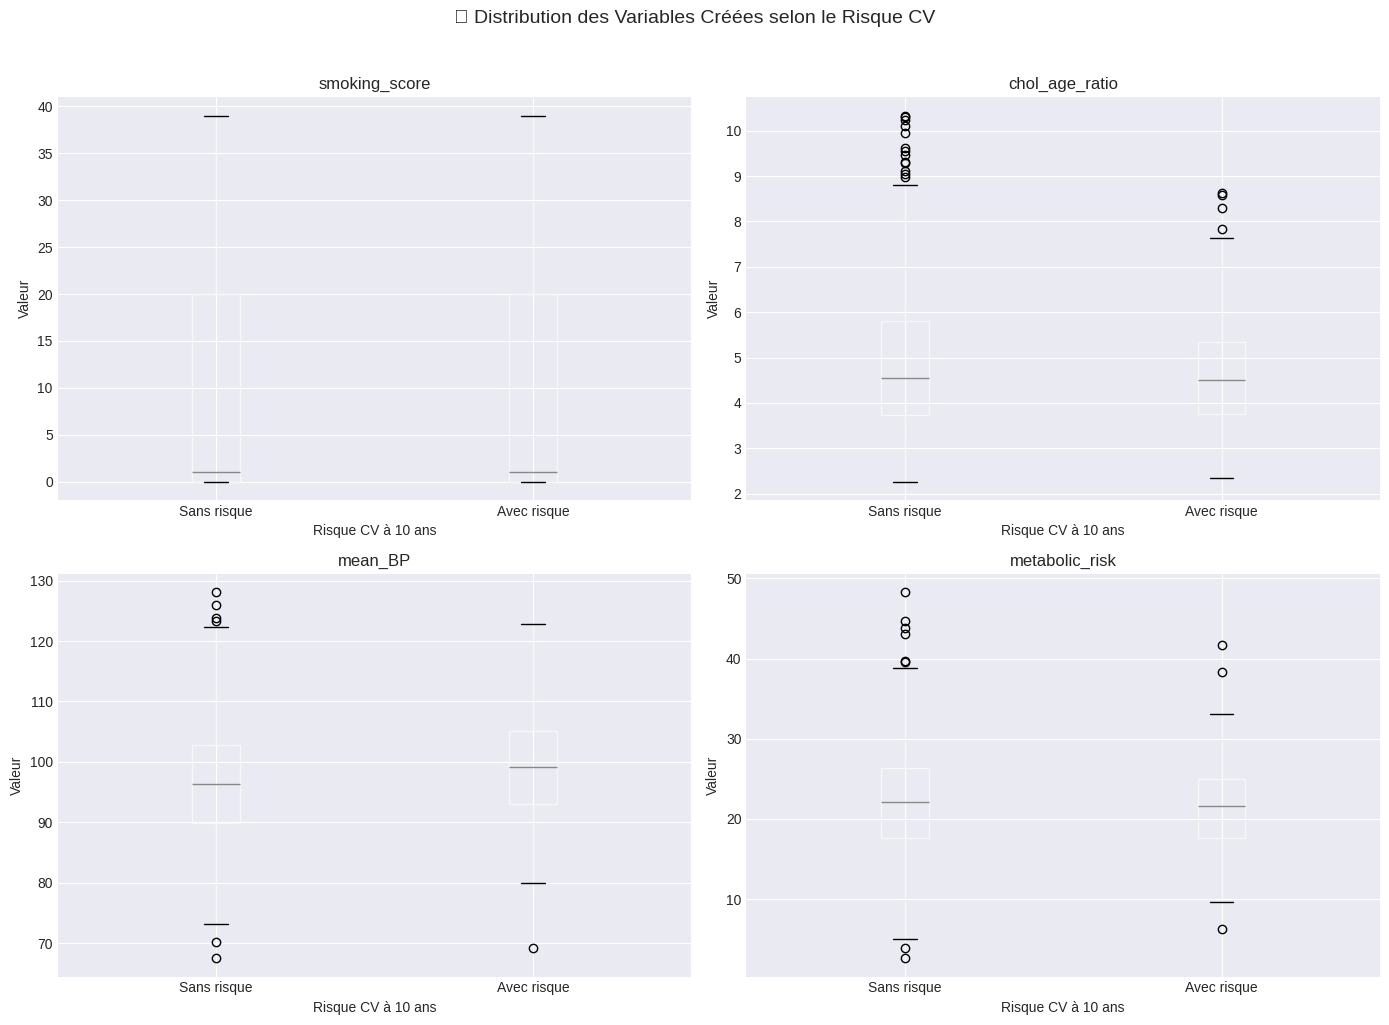


💡 Ces nouvelles variables capturent des interactions complexes
   entre facteurs de risque, augmentant le pouvoir prédictif du modèle.


In [8]:
# Feature Engineering : Création de nouvelles variables cliniquement pertinentes

print("🔧 FEATURE ENGINEERING")
print("="*50)
print("Création de variables dérivées basées sur l'expertise médicale...\n")

# 1. Score de risque tabagique
df_clean['smoking_score'] = df_clean['currentSmoker'] * df_clean['cigsPerDay']
print("✅ smoking_score = currentSmoker × cigsPerDay")

# 2. Rapport cholestérol/âge (risque métabolique relatif)
df_clean['chol_age_ratio'] = df_clean['totChol'] / df_clean['age']
print("✅ chol_age_ratio = totChol / age")

# 3. Tension artérielle moyenne
df_clean['mean_BP'] = (df_clean['sysBP'] + 2*df_clean['diaBP']) / 3
print("✅ mean_BP = (sysBP + 2×diaBP) / 3")

# 4. Indice de risque métabolique combiné
df_clean['metabolic_risk'] = (df_clean['BMI'] * df_clean['glucose']) / 100
print("✅ metabolic_risk = (BMI × glucose) / 100")

# Mise à jour des features
features_engineered = features + ['smoking_score', 'chol_age_ratio', 'mean_BP', 'metabolic_risk']

print(f"\n📊 Nombre de variables : {len(features)} → {len(features_engineered)}")

# Visualisation de l'impact des nouvelles variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

new_features = ['smoking_score', 'chol_age_ratio', 'mean_BP', 'metabolic_risk']
for idx, feat in enumerate(new_features):
    ax = axes[idx//2, idx%2]
    df_clean.boxplot(column=feat, by='TenYearCHD', ax=ax)
    ax.set_title(f'{feat}')
    ax.set_xlabel('Risque CV à 10 ans')
    ax.set_ylabel('Valeur')
    plt.sca(ax)
    plt.xticks([1, 2], ['Sans risque', 'Avec risque'])

plt.suptitle('📈 Distribution des Variables Créées selon le Risque CV', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Ces nouvelles variables capturent des interactions complexes")
print("   entre facteurs de risque, augmentant le pouvoir prédictif du modèle.")

---
## 4. Jumeaux Numériques (Digital Twins) <a id="section4"></a>

### 📌 Points clés : Définition et Concepts

#### 🔮 Qu'est-ce qu'un jumeau numérique ?

**Définition** : Réplique virtuelle d'un patient, d'un organe ou d'un système, mise à jour en temps réel

⚠️ **Attention** : Terme souvent utilisé à tort dans le marketing. Un vrai DT requiert :
- Une **boucle de rétroaction** entre réel et virtuel
- Des **mises à jour continues** des données
- Une **capacité de simulation** prédictive

#### 🔄 Architecture d'un Digital Twin

```
ESPACE RÉEL  ←→  DATA CONNECTOR  ←→  ESPACE VIRTUEL
(Patient)         (Capteurs/EHR)      (Modèle IA/Simulation)
```

#### 📏 Échelles d'application

**Micro → Macro** :
1. **Cellule** : Modèles de réponse cellulaire
2. **Organe** : Simulation d'organe (cœur, poumon)
3. **Patient** : Jumeau numérique individuel
4. **Service** : Flux de patients, ressources hospitalières

#### 🎯 Deux approches complémentaires

**1. Modèles mécanistiques**
- Basés sur les lois physiques/biologiques
- Ex : Équations hémodynamiques, cinétique pharmacologique
- ➕ Interprétables, généralisables
- ➖ Complexes, nécessitent des paramètres précis

**2. Modèles IA/Data-driven**
- Apprentissage à partir de données
- Ex : Réseaux de neurones, Random Forests
- ➕ Capturent des patterns complexes
- ➖ "Boîte noire", nécessitent beaucoup de données

### 🏥 Exemple : Patient au bloc opératoire

**Surveillance hémodynamique** :
- Prédiction de la pression artérielle au déclampage aortique
- Simulation avant gonflement du pneumopéritoine (chirurgie robotique)
- Ajustement personnalisé des vasopresseurs

**Ventilation mécanique** :
- Optimisation des réglages respiratoires
- Prévention des lésions pulmonaires
- Adaptation aux changements peropératoires

### 🔄 Parcours patient : Optimisation péri-opératoire

**Exemple de chirurgie majeure** :
1. **Pré-opératoire** : Simulation du risque, optimisation état du patient
2. **Per-opératoire** : Monitoring et ajustements en temps réel
3. **Post-opératoire** : Prédiction de complications, personnalisation des soins

In [ ]:
# Simulation simplifiée d'un Digital Twin pour le risque cardiovasculaire

class PatientDigitalTwin:
    """Jumeau numérique simplifié d'un patient"""
    
    def __init__(self, patient_data):
        self.data = patient_data
        self.history = [patient_data.copy()]
    
    def update(self, new_data):
        """Mise à jour avec nouvelles données"""
        self.data.update(new_data)
        self.history.append(self.data.copy())
    
    def simulate_intervention(self, intervention):
        """Simule l'effet d'une intervention"""
        simulated_data = self.data.copy()
        
        if intervention == "arrêt_tabac":
            simulated_data['currentSmoker'] = 0
            simulated_data['cigsPerDay'] = 0
            risk_reduction = 0.15  # Réduction du risque de 15%
        
        elif intervention == "statine":
            simulated_data['totChol'] *= 0.7  # Réduction cholestérol de 30%
            risk_reduction = 0.25  # Réduction du risque de 25%
        
        elif intervention == "activité_physique":
            simulated_data['BMI'] *= 0.95  # Réduction BMI de 5%
            simulated_data['sysBP'] -= 5  # Baisse tension
            risk_reduction = 0.10  # Réduction du risque de 10%
        
        else:
            risk_reduction = 0
        
        return simulated_data, risk_reduction
    
    def get_risk_profile(self):
        """Calcule un score de risque simplifié"""
        score = 0
        score += self.data['age'] * 0.5
        score += self.data['male'] * 10
        score += self.data['currentSmoker'] * 15
        score += (self.data['BMI'] - 25) * 2 if self.data['BMI'] > 25 else 0
        score += (self.data['totChol'] - 200) * 0.1 if self.data['totChol'] > 200 else 0
        score += (self.data['sysBP'] - 120) * 0.3 if self.data['sysBP'] > 120 else 0
        return max(0, min(100, score))  # Entre 0 et 100

# Création d'un patient exemple
patient_exemple = {
    'male': 1,
    'age': 55,
    'currentSmoker': 1,
    'cigsPerDay': 20,
    'BMI': 28,
    'totChol': 260,
    'sysBP': 145,
    'diaBP': 90,
    'glucose': 110
}

# Création du Digital Twin
dt = PatientDigitalTwin(patient_exemple)

print("👤 DIGITAL TWIN - PATIENT EXEMPLE")
print("="*50)
print("\n📊 Profil actuel du patient :")
for key, value in patient_exemple.items():
    print(f"  {key:15s} : {value}")

risk_base = dt.get_risk_profile()
print(f"\n⚠️  Score de risque actuel : {risk_base:.1f}/100")

# Simulation de différentes interventions
print("\n\n🔮 SIMULATIONS D'INTERVENTIONS")
print("="*50)

interventions = ["arrêt_tabac", "statine", "activité_physique"]
intervention_names = ["Arrêt du tabac", "Traitement par statine", "Programme d'activité physique"]

results = []

for interv, name in zip(interventions, intervention_names):
    sim_data, risk_red = dt.simulate_intervention(interv)
    dt_sim = PatientDigitalTwin(sim_data)
    risk_sim = dt_sim.get_risk_profile()
    risk_change = ((risk_sim - risk_base) / risk_base) * 100
    
    results.append({
        'intervention': name,
        'risk_before': risk_base,
        'risk_after': risk_sim,
        'risk_change': risk_change
    })
    
    print(f"\n📌 {name}")
    print(f"   Risque avant : {risk_base:.1f}/100")
    print(f"   Risque après : {risk_sim:.1f}/100")
    print(f"   Réduction    : {abs(risk_change):.1f}%")

# Visualisation
results_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['risk_before'], width, label='Avant intervention', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['risk_after'], width, label='Après intervention', alpha=0.8)

ax.set_ylabel('Score de risque (/100)')
ax.set_title('🔮 Simulation Digital Twin\nImpact des interventions sur le risque CV')
ax.set_xticks(x)
ax.set_xticklabels(results_df['intervention'], rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Ajout des pourcentages de réduction
for i, (bar1, bar2, change) in enumerate(zip(bars1, bars2, results_df['risk_change'])):
    height = max(bar1.get_height(), bar2.get_height())
    ax.text(i, height + 2, f'{abs(change):.1f}%', 
            ha='center', va='bottom', fontweight='bold', color='green')

plt.tight_layout()
plt.show()

print("\n\n💡 INTÉRÊT DU DIGITAL TWIN :")
print("="*50)
print("✅ Permet de tester virtuellement différentes stratégies")
print("✅ Aide à la décision partagée médecin-patient")
print("✅ Personnalisation des interventions")
print("✅ Pas de risque pour le patient (simulation)")

---
## 5. Application Pratique : Prédiction du Risque Cardiovasculaire <a id="section5"></a>

### 📌 Objectif pédagogique

Construire et comparer deux modèles de prédiction :
1. **Régression logistique** (modèle "classique", interprétable)
2. **Random Forest** (modèle ML plus complexe, haute performance)

### 🎯 Variable à prédire

**TenYearCHD** : Risque de maladie cardiovasculaire coronarienne dans les 10 prochaines années
- 0 = Pas de risque
- 1 = Risque présent

### 📊 Métriques d'évaluation

- **Accuracy** : Pourcentage de prédictions correctes
- **Sensibilité** : % de vrais positifs détectés (important en santé !)
- **Spécificité** : % de vrais négatifs détectés
- **AUC-ROC** : Aire sous la courbe ROC (0.5 = hasard, 1.0 = parfait)

In [ ]:
# Préparation des données pour l'entraînement

print("📦 PRÉPARATION DES DONNÉES")
print("="*50)

# Utilisation des features avec feature engineering
X = df_clean[features_engineered]
y = df_clean['TenYearCHD']

# Séparation train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Taille du jeu d'entraînement : {X_train.shape[0]} patients")
print(f"✅ Taille du jeu de test        : {X_test.shape[0]} patients")
print(f"✅ Nombre de variables          : {X_train.shape[1]}")

# Normalisation des features (important pour certains algorithmes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Normalisation effectuée (StandardScaler)")
print("   Toutes les variables ont maintenant moyenne=0, écart-type=1")

# Vérification de la distribution de la cible
print("\n📊 Distribution de la variable cible :")
print("   Entraînement :")
print(f"      Sans risque (0) : {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"      Avec risque (1) : {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")
print("   Test :")
print(f"      Sans risque (0) : {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"      Avec risque (1) : {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

In [ ]:
# Entraînement des modèles

print("🚀 ENTRAÎNEMENT DES MODÈLES")
print("="*50)

# Modèle 1 : Régression Logistique
print("\n⏳ Entraînement de la Régression Logistique...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
print("✅ Régression Logistique entraînée")

# Modèle 2 : Random Forest
print("\n⏳ Entraînement du Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)  # Pas besoin de normalisation pour RF
print("✅ Random Forest entraîné")

# Prédictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n✅ Prédictions effectuées sur le jeu de test")

In [ ]:
# Évaluation des modèles

print("📊 ÉVALUATION DES MODÈLES")
print("="*70)

# Fonction pour afficher les métriques
def print_metrics(y_true, y_pred, y_pred_proba, model_name):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    print(f"\n{'─'*70}")
    print(f"📈 {model_name}")
    print(f"{'─'*70}")
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)
    
    print(f"\n  Accuracy (Exactitude)      : {acc:.3f} ({acc*100:.1f}% de prédictions correctes)")
    print(f"  Precision                  : {prec:.3f} (Fiabilité des prédictions positives)")
    print(f"  Recall (Sensibilité)       : {rec:.3f} (% de vrais cas détectés) ⚕️")
    print(f"  F1-Score                   : {f1:.3f} (Équilibre precision/recall)")
    print(f"  AUC-ROC                    : {auc:.3f} (Capacité de discrimination)")
    
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'auc': auc}

# Évaluation des deux modèles
metrics_lr = print_metrics(y_test, y_pred_lr, y_pred_proba_lr, "RÉGRESSION LOGISTIQUE")
metrics_rf = print_metrics(y_test, y_pred_rf, y_pred_proba_rf, "RANDOM FOREST")

print("\n" + "="*70)
print("\n💡 INTERPRÉTATION CLINIQUE")
print("="*70)
print("\n⚕️  SENSIBILITÉ (Recall) : Métrique clé en santé !")
print("   → Correspond au % de patients à risque correctement identifiés")
print("   → Un recall élevé = peu de faux négatifs (patients à risque manqués)")
print("\n🎯 PRÉCISION : Importance du contexte clinique")
print("   → Précision élevée = peu de faux positifs (fausses alarmes)")
print("   → Trade-off à considérer selon la gravité des conséquences")

In [ ]:
# Visualisation des matrices de confusion

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matrice de confusion - Régression Logistique
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            cbar_kws={'label': 'Nombre de patients'})
axes[0].set_title('🔍 Régression Logistique\nMatrice de Confusion')
axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réalité')
axes[0].set_xticklabels(['Sans risque', 'Avec risque'])
axes[0].set_yticklabels(['Sans risque', 'Avec risque'])

# Matrice de confusion - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            cbar_kws={'label': 'Nombre de patients'})
axes[1].set_title('🌲 Random Forest\nMatrice de Confusion')
axes[1].set_xlabel('Prédiction')
axes[1].set_ylabel('Réalité')
axes[1].set_xticklabels(['Sans risque', 'Avec risque'])
axes[1].set_yticklabels(['Sans risque', 'Avec risque'])

plt.tight_layout()
plt.show()

# Explication des quadrants
print("\n📊 LECTURE DE LA MATRICE DE CONFUSION")
print("="*50)
print("\n  Haut-Gauche (VN)  : Vrais Négatifs  ✅ (Correctement identifiés sans risque)")
print("  Haut-Droite (FP)  : Faux Positifs  ⚠️  (Fausse alarme)")
print("  Bas-Gauche (FN)   : Faux Négatifs  🔴 (Patients à risque manqués - DANGER)")
print("  Bas-Droite (VP)   : Vrais Positifs ✅ (Patients à risque correctement détectés)")

In [ ]:
# Courbes ROC

plt.figure(figsize=(10, 7))

# ROC pour Régression Logistique
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Régression Logistique (AUC = {auc_lr:.3f})', 
         linewidth=2)

# ROC pour Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', 
         linewidth=2)

# Ligne de référence (hasard)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.500)', linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (Sensibilité)', fontsize=12)
plt.title('📈 Courbes ROC\nCapacité de discrimination des modèles', fontsize=14, pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 INTERPRÉTATION DE L'AUC-ROC")
print("="*50)
print("\n  AUC = 0.5  : Le modèle ne fait pas mieux que le hasard")
print("  AUC = 0.7  : Discrimination acceptable")
print("  AUC = 0.8  : Bonne discrimination")
print("  AUC = 0.9+ : Excellente discrimination")
print("  AUC = 1.0  : Discrimination parfaite (rare en pratique)")
print("\n  Plus la courbe s'éloigne de la diagonale, meilleur est le modèle.")

In [ ]:
# Importance des variables (Random Forest)

# Extraction de l'importance des features
feature_importance = pd.DataFrame({
    'feature': features_engineered,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualisation
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('🌲 Random Forest - Importance des Variables\nContribution à la prédiction du risque CV', 
          fontsize=14, pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 TOP 5 DES VARIABLES LES PLUS IMPORTANTES")
print("="*50)
for idx, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']:20s} : {row['importance']:.4f}")

print("\n💡 Ces variables ont le plus de poids dans la prédiction du modèle")

In [ ]:
# Prédiction pour un patient individuel

print("👤 PRÉDICTION INDIVIDUELLE")
print("="*70)

# Sélection d'un patient du jeu de test
patient_idx = 0
patient = X_test.iloc[patient_idx]
patient_scaled = X_test_scaled[patient_idx].reshape(1, -1)
patient_data = X_test.iloc[patient_idx:patient_idx+1]

# Prédictions
proba_lr = lr_model.predict_proba(patient_scaled)[0][1]
proba_rf = rf_model.predict_proba(patient_data)[0][1]
true_value = y_test.iloc[patient_idx]

print("\n📋 Profil du patient :")
print("─" * 70)
for feat, val in patient.items():
    print(f"  {feat:20s} : {val:.2f}")

print("\n🔮 Prédictions des modèles :")
print("─" * 70)
print(f"\n  Régression Logistique :")
print(f"    Probabilité de risque CV : {proba_lr*100:.1f}%")
print(f"    Classification           : {'RISQUE' if proba_lr > 0.5 else 'PAS DE RISQUE'}")

print(f"\n  Random Forest :")
print(f"    Probabilité de risque CV : {proba_rf*100:.1f}%")
print(f"    Classification           : {'RISQUE' if proba_rf > 0.5 else 'PAS DE RISQUE'}")

print(f"\n  🎯 Valeur réelle : {'RISQUE' if true_value == 1 else 'PAS DE RISQUE'}")

# Visualisation
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Régression\nLogistique', 'Random\nForest', 'Réalité']
probas = [proba_lr*100, proba_rf*100, true_value*100]
colors = ['steelblue', 'forestgreen', 'coral']

bars = ax.bar(models, probas, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Seuil de décision (50%)')
ax.set_ylabel('Probabilité de risque CV (%)', fontsize=12)
ax.set_title('👤 Prédiction Individuelle\nComparaison des modèles pour ce patient', 
             fontsize=14, pad=15)
ax.set_ylim([0, 105])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Ajout des valeurs au-dessus des barres
for bar, prob in zip(bars, probas):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{prob:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Illustration de la médecine personnalisée :")
print("   Cette prédiction est spécifique à CE patient,")
print("   basée sur SON profil individuel de facteurs de risque.")

---
## 🎓 Conclusion et Points Clés à Retenir

### 📌 Ce que nous avons appris

1. **🔄 Changement de paradigme**
   - Statistiques classiques : Inférence populationnelle
   - IA/ML : Prédiction individuelle personnalisée

2. **🤖 Applications de l'IA en médecine**
   - Phénotypage de patients
   - Aide à la décision clinique
   - Systèmes d'alerte précoce (Early Warning)
   - Formation et pédagogie

3. **🔮 Jumeaux numériques (Digital Twins)**
   - Répliques virtuelles pour simulation et optimisation
   - Applications du micro (cellule) au macro (service hospitalier)
   - Combinaison de modèles mécanistiques et data-driven

4. **⚠️ Limites et défis**
   - Représentativité des données
   - Effet "boîte noire" et interprétabilité
   - Cadre réglementaire en évolution (AI Act, RGPD)
   - Nécessité de la garantie humaine

5. **📊 Aspects pratiques**
   - Importance du feature engineering
   - Choix des métriques selon le contexte clinique
   - Sensibilité (recall) cruciale en santé
   - Trade-off sensibilité/spécificité

### 🚀 Perspectives

- **Aujourd'hui** : Recherche active, peu de modèles en production
- **Demain** : Intégration progressive dans les parcours de soins
- **Clé du succès** : Formation des professionnels, validation rigoureuse, acceptabilité

### 📚 Pour aller plus loin

- Consulter les articles scientifiques sur les Digital Twins en santé
- Explorer les datasets médicaux publics (MIMIC, UK Biobank)
- Se former aux outils d'IA explicable (SHAP, LIME)
- Suivre l'évolution réglementaire (AI Act européen)

---

## 💬 Questions et Discussion

N'hésitez pas à :
- Modifier les paramètres des modèles
- Tester d'autres algorithmes
- Créer de nouvelles variables
- Explorer différents patients

**Bon apprentissage ! 🎓**

---
## 📖 Références

### Datasets
- Framingham Heart Study Dataset (Kaggle)

### Articles scientifiques cités
- Halpern et al. (2025). "Advances and utility of digital twins in critical care and acute care medicine". J Yeungnam Med Sci.
- Eslami et al. (2024). "Toward Digital Twins in the Intensive Care Unit: A Medication Management Case Study". medRxiv preprint.

### Cours UE IA en Santé
- Support de cours : IA et Médecine Personnalisée
- MCC et syllabus UE commune IASanté (2025-2026)

---

*Notebook créé pour l'UE IA en Santé - Faculté de Santé*

*Dernière mise à jour : Janvier 2025*